<a href="https://colab.research.google.com/github/gkadusumilli/CNN-architectures/blob/main/VGGNet_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>CNN Architectures </center>


#<center> Part 2: VGGNet 16 implementation using keras<center>

In this notebook we will build VGGNet model from the scratch using keras.

Link to the VGGNet Paper: https://arxiv.org/abs/1409.1556

**VGGNet was developed at Visual Geometry Group (VGG) in the year 2014.**

The architecture contain 16 layers out of which 13 convolutional layers, three fully connected layers. 

The key highlight is VGGNet is a deeper network with more Conv layers, pooling, and dense layers i.e a uniform architecture makes this architecture a popular.

VGGNet-16 Architecture

![VGGNet-16](https://drek4537l1klr.cloudfront.net/elgendy/v-3/Figures/05_09.png)

VGGNet-16 Architecture

**Input image -->Conv 1 -->Conv 2 -->Pool -->Conv 3 -->Conv 4 -->Pool -->Conv 5 -->Conv 6 -->Conv 7 -->Pool -->Conv 8 -->Conv 9 -->Conv 10 -->Pool -->Conv 11 -->Conv 12 -->Conv 13 -->Pool -->FC 14-->FC 15 -->Softmax 16**


###Novel feartures of VGGNet

1. Unifrom layer configuration: Improves on AlexNet by replacing large kernel-sized filters with 3 x 3 kernel sized filters with **stride = 1** and a **padding - same** throughout the architecture Conv layers.

2. All pooling layers have 2 x 2 pool size and a strides value of 2.

**Benefits of small kernel sized filter**

>* Mutiple stacked small kernels is better than the larger kernel because having multiple nonlinear layers increases the depth of the network. This enables it to learn more complex features.

> * Authors have experienced that, two 3 x 3 Conv layers (without spatial pooling in between) has an effective of using 5 x 5 receptive field and in similar three 3 x 3 Conv have the effect of 7 x 7 receptive field. So using smaller 3 x 3 Conv layers with higher depth, which makes the decision function more descriminative.

> * Smaller kernel-sized filters decreases the number of training parameters. For instance, three-layer 3 x 3 convolutional with C channels, stack is parameterised as $3^2C^2 = 27C^2$ weights compared to a single 7 x 7 convolutional layer that need $7^2C^2 = 49C^2$ weights, which is 81% more parameters. 


***Receptive field - the area of the image that the filter convolved is called the receptive field***








* **Number of filters in each convolutional layer**

>>Depth (Number of filters)

>>Conv 1 & 2 - 64 layers

>>Conv 3 & 4 layer - 128 layers

>>Conv 5, 6, 7 - 256 layers

>>Conv 8, 9, 10 - 512 layers

>>Conv 11, 12, 13 - 512 layers

* **The authors have used uniform kernel_size 3 x 3 with padding 1 and stride 1** throughout the architecture

* **Max-pooling layers**

>>The **pool size is 2 x 2 with stride 2**.

>>*The authors have used **max-pooling**, which computes the maximum value of its inputs.*

* **Activation function**: The creators have used **ReLu** activation function for the hidden layers. Since ReLu has showed faster during training when used in between the hidden layers*

>>$f(x) = max(0, x)$


Summary of the layers stacked toghether are as follows

* Conv 1 & 2--> Kernel size = 3 x 3, depth = 64, and stride = 1, padding = 1 (Input image: 224 x 224 x 3)

* Pool-->2 x 2 size with stride 2, which downsamples its input dimensions from 224 x 224 to 112 x 112. (Note: layer size unaltered after pooling, so 112 x 112 x 64)

* Conv 3 & 4-->Kernel size = 3 x 3, depth = 128, and stride = 1, padding = 1 (112 x 112 x 64)

* Pool-->2 x 2 size with stride 2, which downsamples its input dimensions from 112 x 112 to 56 x 56 

* Conv 5, 6, 7-->Kernel size = 3, depth = 256, and stride = 1 (56 x 56 x 256)

* Pool-->2 x 2 size with stride 2, which downsamples its input dimensions from 56 x 56 to 28 x 28 

* Conv 8, 9, 10-->Kernel size = 3, depth = 512, and stride = 1 (28 x 28 x 512)

* Pool-->2 x 2 size with stride 2, which downsamples its input dimensions from 28 x 28 to 14 x 14

* Conv 11, 12, 13-->Kernel size = 3, depth = 512, and stride = 1 (14 x 14 x 512)

* Pool-->2 x 2 size with stride 2, which downsamples its input dimensions from 14 x 14 to 7 x 7 (7 x 7 x 512)

* FC with 4096 neurons

* FC with 4096 neurons

* Softmax layer







formula to calculate the layer dimensions

$N_{out} = {\frac{[n_{in} + 2p - k]}{s}} + 1$

Example

* **Conv layer 1 & 2**

> * Input image size 224 x 224 x 3
> * Kernel size 3 x 3
> * Stride 1 
> * Depth 64


>>$Conv 1 \& 2 = {\frac{[224 + (2\times 1) - 3]}{1}} + 1$ = $224$

> * Depth is the number of filters in the conv layer is 64 hence the output dimensions are 224 x 224 x 64

* Pooling - Max- pooling of (2, 2) result 

>>$Pool = {\frac{[224 + (2 \times 0) - 2]}{2}} + 1$ = $112$
>>The pooling layer does not change the depth of the volume. The output dimensions are 112 x 112 x 64




In [ ]:
"""
#Alexnet model representation
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    

model.add(Dense(units =256, activation="relu"))
model.add(Dense(units =256, activation="relu"))
model.add(Dense(units=2, activation="softmax")
"""


'\n#Alexnet model representation\nmodel = Sequential()\nmodel.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activati

In [ ]:
#model.summary()

#VGGNet Architecture implementation using keras to classify Dog and Cats of images 

To leverage the good accuracy we use a pre-trained VGG 16 trained on Imagenet dataset containing 14 million images.
With the transfer learning approach, we freeze the middle Convolutional layers and train the last fully connected layers with our custom dataset 

####1. Import the dependencies

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

####2. Preparing the data

In [ ]:
#downloading the data

!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

!unzip /content/cats_and_dogs_filtered.zip 

In [ ]:
#Generating training and validation data using the data generator
#refer: keras documentation on Image data generator
train_path = '/content/cats_dog_data/train'
valid_path = '/content/cats_dog_data/validation'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


####3 Visualise the training images

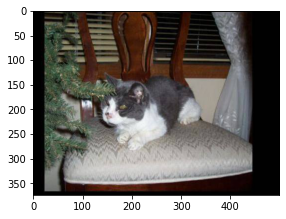

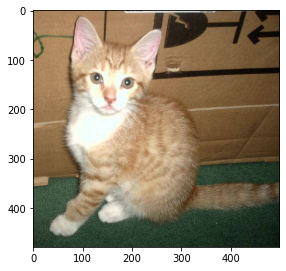

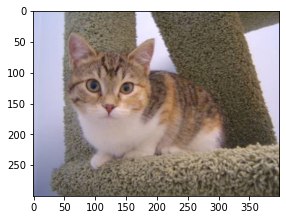

In [ ]:
import matplotlib.pyplot as plt
import glob, os
    
for file in glob.glob("/content/cats_dog_data/train/cats/*.jpg")[0:3]:
    im = plt.imread(file)
    plt.figure(figsize=(15,20))
    plt.subplot(3,3,2)
    plt.imshow(im)
    plt.show()
  

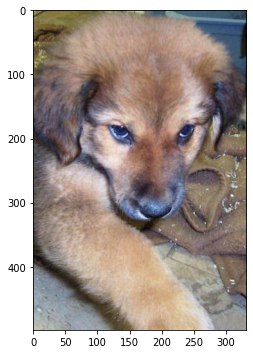

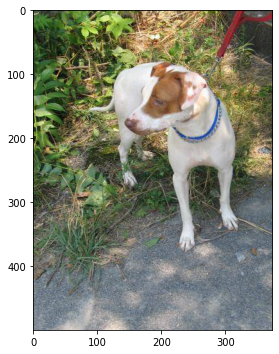

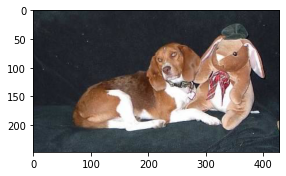

In [ ]:
import matplotlib.pyplot as plt
import glob, os
    
for file in glob.glob("/content/cats_dog_data/train/dogs/*.jpg")[0:3]:
    im = plt.imread(file)
    plt.figure(figsize=(15,20))
    plt.subplot(3,3,2)
    plt.imshow(im)
    plt.show()

####5. Model architecture

![VGGNet-16](https://drek4537l1klr.cloudfront.net/elgendy/v-3/Figures/05_09.png)


In [ ]:
#We are using a pre-trained model we need to define the size of the image. 
#VGG model need a 224 x 224 x 3 size of the image
IMAGE_SIZE = [224, 224]

In [ ]:
#loading the VGG model
#we removed the output layer by include_top = False
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#we are freezing the middle layers freeze
for layer in vgg.layers:
  layer.trainable = False

We add our output layer with only one node.

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(1, activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

####6. Model training & Compiling

Since our classification task is binary we can use binary cross entropy and adam as an optimizer.

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = model.fit_generator(
  training_set,  
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
125/125 [==============================] - 31s 245ms/step - loss: 0.4816 - accuracy: 0.7594 - val_loss: 0.2306 - val_accuracy: 0.8990
Epoch 2/15
125/125 [==============================] - 30s 242ms/step - loss: 0.2343 - accuracy: 0.9111 - val_loss: 0.2027 - val_accuracy: 0.9250
Epoch 3/15
125/125 [==============================] - 30s 241ms/step - loss: 0.2140 - accuracy: 0.9179 - val_loss: 0.1993 - val_accuracy: 0.9200
Epoch 4/15
125/125 [==============================] - 30s 241ms/step - loss: 0.1529 - accuracy: 0.9387 - val_loss: 0.1990 - val_accuracy: 0.9240
Epoch 5/15
125/125 [==============================] - 30s 242ms/step - loss: 0.1131 - accuracy: 0.9654 - val_loss: 0.2367 - val_accuracy: 0.8940
Epoch 6/15
125/125 [==============================] - 30s 243ms/step - loss: 0.1107 - accuracy: 0.9559 - val_loss: 0.1920 - val_accuracy: 0.9220
Epoch 7/15
125/125 [==============================] - 30s 241ms/step - loss: 0.1168 - accuracy: 0.9590 - val_loss: 0.2512 - val_ac

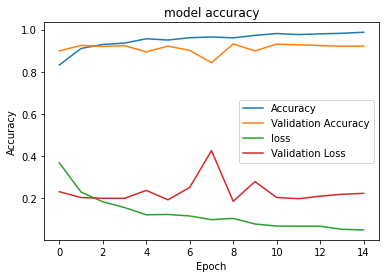

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history["accuracy"])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

DOG


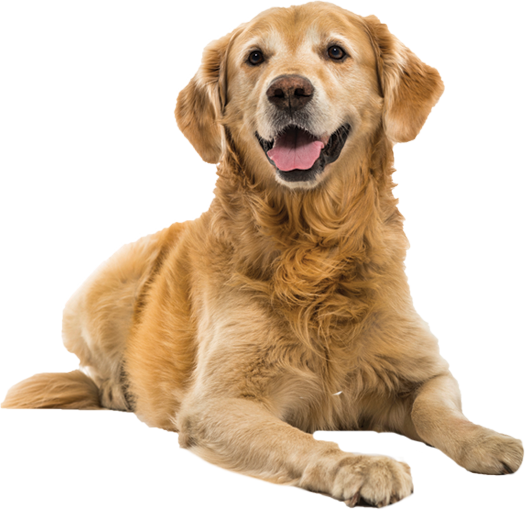

In [ ]:
from IPython.display import Image
from keras.preprocessing import image
import tensorflow
img_path = "/content/dog_test.png"##new image path

test_image = image.load_img(img_path, target_size = [224,224])
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result==0:
    print("CAT")
else:
    print("DOG")
display(Image(img_path))



CAT


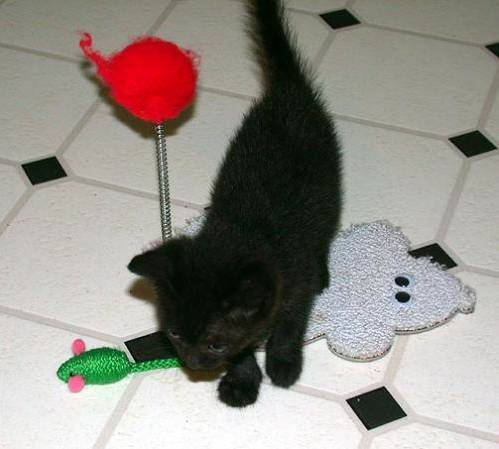

In [ ]:
img_path = "/content/cats_dog_data/validation/cats/cat.2002.jpg"##new image path

test_image = image.load_img(img_path, target_size = [224,224])
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result==0:
    print("CAT")
else:
    print("DOG")
display(Image(img_path))